## 1. Intuition of LightGBM

Light GBM grows tree vertically unlike other tree based methods which are grow trees horizontally.

LightGBM: leaf-wise; 

Other tree based methods: level-wise.

### 1.1 Leaf-wise tree growth

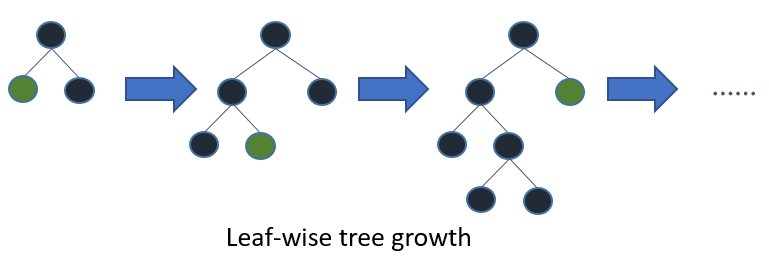

### 1.2 Level-wise tre growth

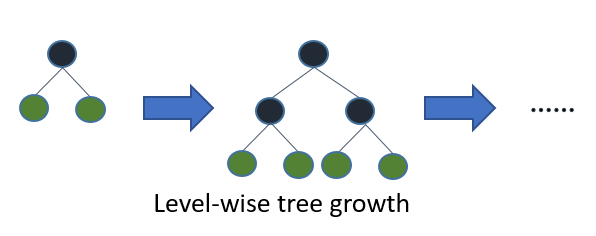

## 2. Parameters

### 2.1 Control Parameters



*   **max_depth**: Set for the maximum depth of the tree. Used for handle overfitting.
*   **min_data_in_leaf**: Minimum number of records a leaf have. Avoid overfitting.
*   **feature_fraction**: Used only when boosting is random forest. Used to control the percentage of parameters randomly selected in each iteration for building trees. 
*   **bagging_fraction**: Sepcifies the fraction of data to be used for each iteration and is generally used to speed up the traing and avoid overfitting. 
*   **early_stopping_round**: Set up rounds if one metric of one validation data doesn't improve in early_stopping_round rounds.
*   **lambda**: Regularization.
*   **min_gain_to_split**: Control the number of useful splits in the tree.
*   **max_cat_group**: Find the split points on the group boundaries.







### 2.2 Core Parameters

*   **Task**: It specifies the task you want to perform on data. Either train/predict.
*   **application**: Specify the application of your model.

      *   Regression
      *   Binary
      *   Multiclass
*   **boosting**: Defines the type of algorithm

      *   gbdt: Gradient Boosting Decision Tree
      *   rf: Random Forest
      *   dart: Dropouts meet Multiple Additive Regression Trees
      *   goss: Gradient_based one-side sampling (Retains instances with large gradients while performing random sampling on instances with small graidents).

*   **num_boost_round**: Number of boosting iterations.
*   **learning_rate**: Determines the impact of each tree on the final outcome. Controls the magnitude of this change in the estimates. 
*   **num_leaves**: number of leaves in full tree.
*   **device**: cpu/gpu















### 2.3 IO Parameter

*   **max_bin**: Denotes the maximum number of bin that feature value will bucket in. 
*   **categorical_feature**: It denotes the index of categorical feature. 
*   **ignore_column**: Same as categorical_features. 



## 3. Implement in Python

### 3.1 Data Prep

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Breast_cancer_data.csv")
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 3.2 LightGBM Modeling

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9240


In [ ]:
# Compare train and test accuracy
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
# Check for overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9240


### 3.3 Evaluation

Confusion matrix

 [[ 55   8]
 [  5 103]]

True Positives(TP) =  55

True Negatives(TN) =  103

False Positives(FP) =  8

False Negatives(FN) =  5


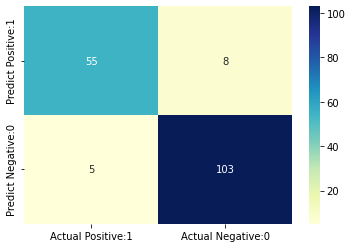

In [ ]:
# Evaluation
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        63
           1       0.93      0.95      0.94       108

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



### 3.4 Parameter Tuning

In [1]:
# grid search  hyperparameter tuning

# parameters = {
#     'task' : ['predict'],
#     'boosting': ['gbdt' ],
#     'objective': ['root_mean_squared_error'],
#     'num_iterations': [  1500, 2000,5000  ],
#     'learning_rate':[  0.05, 0.005 ],
#    'num_leaves':[ 7, 15, 31  ],
#    'max_depth' :[ 10,15,25],
#    'min_data_in_leaf':[15,25 ],
#   'feature_fraction': [ 0.6, 0.8,  0.9],
#     'bagging_fraction': [  0.6, 0.8 ],
#     'bagging_freq': [   100, 200, 400  ],
     
# }

# gsearch_lgb = GridSearchCV(lgb_model, param_grid = parameters, n_jobs=6,iid=False, verbose=10)
# gsearch_lgb.fit(X_train,y_train)
 

#### 3.4.1 Faster Speed



*   Use bagging by setting `bagging_fraction` and `bagging_freq`
*   Use feature sub-sampling by setting `feature_fraction`
*   Use small `max_bin`
*   Use `save_binary` to speed up the data loading in future learning.



#### 3.4.2 Higher accuracy


*   Large `max_bin`
*   Small `learning_rate` with large `num_iterations`
*   Large `num_leaves`
*   Bigger training data
*   Try `dart`
*   Try to use categorical feature directly


#### 3.4.3 Avoid Overfitting

*   Small `max_bin`
*   Small `num_leaves`
*   Use `min_data_in_leaf` and `min_sum_hessian_in_leaf`
*   Use bagging by set `bagging_fraction` and `bagging_freq`
*   Use feature sub-sampling by set `feature_fraction`
*   Bigger training data
*   Try `lambda_l1` and `lambda_l2` and `min_gain_to_split` to regularization
*   Set `max_depth` to avoid growing deep tree

## 4. Reference:
1. https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python/notebook
2. https://github.com/microsoft/LightGBM